<a href="https://colab.research.google.com/github/yskim1230/AIB_Section3-PJT_Deep-Learning/blob/main/review_analysis(%EC%A0%9C%EC%A1%B0%EC%82%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기계학습을 이용한 감정분석
한국어 자연어 처리 konlpy와 형태소 분석기 MeCab설치


In [4]:
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash

mecab-ko is already installed
mecab-ko-dic is already installed
Install mecab-python
/tmp /content
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!python3 -m pip install --upgrade pip
!python3 -m pip install konlpy       # Python 3.x
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
curl is already the newest version (7.68.0-1ubuntu2.18).
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libxkbfile1 libxtst6 libxxf86dga1
  openjdk-8-jdk-headless openjdk-8-jre openjdk-8-jre-headless python-pip-whl
  python3-setuptools python3-wheel x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic python-setuptools-doc mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-e

In [49]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Okt, Mecab


<ipython-input-49-71a44c265901>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section3-PJT_Deep-Learning/main/df.csv')
df

,Grade,Review,type
0,1,포름알데히드를 제거하는지 잘 모르겠어요 판매처에 전화해도 안받네요..따로 산 측정기...,dyson
1,1,한 두푼도 아닌데 검수가 제대로 안되나봐요…? 새상품 비닐 벗기자마자 스크래치 있어...,dyson
2,1,음 한달도 사용안했는데 고장인것 같아요…,dyson
3,1,아기 있어서 샀는데\n틈새 바람 나오는 곳에서 하얀 가루 날려서 나오는거 뭔가요??...,dyson
4,1,아놔 공식사이트 가격이 99만이네여\n더 비싸게 샀네,dyson
...,...,...,...
1543,5,공기청정기 생각했던것 보다 커서 마음에 쏙 들어요.\n집안 안좋은 공기들이 쏙쏙 빨...,winix
1544,5,공청기 1등급으로 알아보던중 가성비로 쿠쿠와 위닉스중에 고민하다 위닉스를 선택했어요...,winix
1545,5,"에너지소비효율 1등급, 넓은 공기청정 면적, 350도 서라운드 방식, CA인증마크 ...",winix
1546,5,제가 생각했던거보다 크기가 커서 상당히 놀랐지만 무겁지는 않네요. 일단 필터 교체하...,winix


# 훈련/테스트 분리

In [51]:
from sklearn.model_selection import train_test_split

# Features (별점, 리뷰)와 Labels (제조사)로 분할
X = df[['Grade', 'Review']]
y = df['type']

# train/test set으로 분할 (80% train set, 20% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 정제

In [52]:
#train셋  정규표현식 사용, 한글과 공백을 제외하고 모두 제거
X_train['Review'] = X_train['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힝 ]","")
X_train

<ipython-input-52-f881549db99c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['Review'] = X_train['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힝 ]","")


,Grade,Review
680,3,제품이좋고싸고잘구매해습니다
1079,1,위닉스공기청정기불만
1190,4,환기잘하고 청소잘 하면굳이 공기청소기가 필요할까해서 여태 없이 살았는데요 몇일 청소...
864,4,잘 사용하고있어요거실에 딱이네요
743,4,핫딜이 떠서 조금이나마 싸게 샀네요 청정기 상판이 검정색이라 무난합니다 미세먼지 안...
...,...,...
1130,3,잘되는건지 모르겠음갑자기 수치가 확올라갓다 내려옴
1294,4,오토모드가 편해요취침 중에는 조용하구요공기정화 잘 되는 거 같아요ㅎㅎ
860,4,더 사용해봐야겠지만 무난한거 같아요
1459,5,위닉스 공기청정기를 년넘게사용 해오다가 이번에 바꾸려고 여러브랜드를 검토했는데 결국...


In [53]:
# train셋 nan 확인 
X_train['Review'].replace('', np.nan, inplace = True)
print(X_train.isnull().sum())

# train셋  nan 제거
X_train = X_train.dropna(how='any')
print(X_train.isnull().sum())

Grade     0
Review    1
dtype: int64
Grade     0
Review    0
dtype: int64


In [54]:
#test셋  정규표현식 사용, 한글과 공백을 제외하고 모두 제거
X_test['Review'] = X_test['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힝 ]","")
X_test

<ipython-input-54-722de7b58583>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['Review'] = X_test['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힝 ]","")


,Grade,Review
30,4,벼르던 다이슨 라방보고 주문했어요색상도 고급지고 디자인도 맘에 들어요사이즈도 생각보...
1514,5,실물보니 크기가 크네요ㅎㅎ평수생각하면 작을수는없다고 생각합니다설치하고 작동시키니 바...
1182,4,라이브 방송으로 충분히 봤음에도 직접 받아보니 어마어마하게 크다고 느꼈어요 크기에 ...
1205,4,한 달 사용을 해보니 약간 문제는 위쪽에 먼지가 쌓일 경우 미니 청소기로 청소를 해...
528,5,코웨이 공기청정기만 년째 쓰다가 오래 된고 같아서 이거 엘지로 바꿨는데얘가 년된 코...
...,...,...
1228,4,조카가 안전해서 누나가 좋아해요 손가락 들어갈 틈 없고 소리도 크지 않아 만족합니다...
1065,1,여기저기 이동하기는 편리한데 미세먼지가 많은 날 환기시키고 전원을 켜도 빨간불이 안...
1345,4,공기청정 좋네요 ㅎㅎ
485,5,신혼가전으로 삼성을 싹 맞췄는데 년밖에 안썼는데 잔고장도 있고 이슈도 있어서 불만족...


In [55]:
# train셋 nan 확인 
X_test['Review'].replace('', np.nan, inplace = True)
print(X_test.isnull().sum())

# train셋  nan 제거
X_test = X_test.dropna(how='any')
print(X_test.isnull().sum())

Grade     0
Review    0
dtype: int64
Grade     0
Review    0
dtype: int64


# 토큰화 및 불용어 제거

In [57]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [58]:
from konlpy.tag import Okt
okt = Okt()

# train셋을  okt 형태소 분석을 이용하여 불용어 제거 후 리스트에 저장
X_train_okt = []
for sentence in X_train['Review']:
  X_train_okt.append([word for word in okt.morphs(sentence) if not word in stopwords])


In [59]:
# test 셋을 okt 형태소 분석을 이용하여 불용어 제거 후 리스트에 저장
X_test_okt = []
for sentence in X_test['Review']:
  X_test_okt.append([word for word in okt.morphs(sentence) if not word in stopwords])


In [60]:
# tokenizer 설치
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
tokenizer.fit_on_texts(X_train_okt)
print(tokenizer.word_index)

{'잘': 1, '배송': 2, '으로': 3, '제품': 4, '사용': 5, '로': 6, '구매': 7, '공기청정기': 8, '하고': 9, '너무': 10, '공기': 11, '것': 12, '필터': 13, '좋아요': 14, '소음': 15, '보다': 16, '가격': 17, '디자인': 18, '생각': 19, '공': 20, '같아요': 21, '집': 22, '때': 23, '했는데': 24, '요': 25, '더': 26, '에서': 27, '작동': 28, '위': 29, '해서': 30, '했어요': 31, '성능': 32, '닉스': 33, '할': 34, '미세먼지': 35, '구입': 36, '좋은': 37, '안': 38, '좀': 39, '이라': 40, '입니다': 41, '기능': 42, '거': 43, '합니다': 44, '만족합니다': 45, '까지': 46, '일': 47, '냄새': 48, '모드': 49, '정도': 50, '주문': 51, '중': 52, '거실': 53, '고민': 54, '청정': 55, '바로': 56, '비': 57, '수': 58, '했습니다': 59, '좋네요': 60, '크기': 61, '있어서': 62, '만': 63, '적': 64, '소리': 65, '바퀴': 66, 'ㅎㅎ': 67, '정말': 68, '인데': 69, '먼지': 70, '빠르고': 71, '이동': 72, '가성': 73, '마음': 74, '많이': 75, '저': 76, '센서': 77, '있는': 78, '다이슨': 79, '없이': 80, '수치': 81, '좋습니다': 82, '후': 83, '상품': 84, '서': 85, '하나': 86, '해': 87, '기': 88, '날': 89, '방': 90, '하는': 91, '면': 92, '보니': 93, '라': 94, '제': 95, '타워': 96, '설치': 97, '사': 98, '일단': 99, '선물': 100, '보고': 101, '아주

# 빈도수가 낮은 단어 제거

In [62]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt +=1
    rare_freq = rare_freq + value

print("전제단어 수:", words_cnt)
print("빈도가 {} 이하인 희귀 단어수 :{}".format(threshold-1, rare_cnt))
print("희귀단어 비율:{}".format((rare_cnt/words_cnt)*100))
print("희귀단어 등장 빈도 비율:{}".format((rare_freq/words_freq)*100))





전제단어 수: 7385
빈도가 2 이하인 희귀 단어수 :5343
희귀단어 비율:72.34935680433311
희귀단어 등장 빈도 비율:16.26731319800882


In [63]:
vocab_size = words_cnt-rare_cnt+2
print(vocab_size)

2044


In [64]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train_okt)
X_train_okt = tokenizer.texts_to_sequences(X_train_okt)
X_test_okt = tokenizer.texts_to_sequences(X_test_okt)

In [65]:
drop_train = [index for index, sentence in enumerate(X_train_okt) if len(sentence) < 1]
X_train_okt = np.delete(X_train_okt,drop_train, axis=0)
y_train = np.delete(y_train,drop_train, axis=0)
print(len(X_train_okt))
print(len(y_train))


1237
1238


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


# 패딩


In [66]:
#리뷰의 전반적인 길이 확인 및 모델의 입력을 위해 동일한 길이로 맞춰준다

print('리뷰 최대길이:', max(len(l) for l in X_train_okt))
print('리뷰 평균길이:', sum(map(len,X_train_okt))/len(X_train_okt))

리뷰 최대길이: 902
리뷰 평균길이: 31.34276475343573


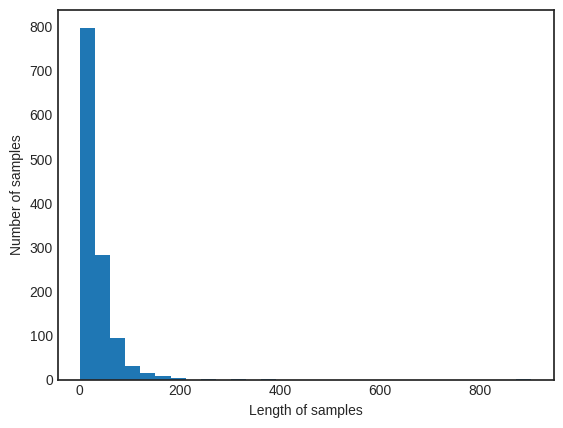

In [67]:
plt.hist([len(s) for s in X_train_okt], bins=30)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.show()

In [68]:
max_len = 200

In [69]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_okt = pad_sequences(X_train_okt, maxlen= max_len)
X_test_okt = pad_sequences(X_test_okt, maxlen= max_len)

# 모델작성
## 감정 상태 분류 모델을 선언하고 학습
## 모델은 일반적인 LSTM 모델을 사용

In [70]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [71]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# 제조사 값을 정수로 인코딩
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 정수 인코딩된 값을 one-hot 인코딩으로 변환
y_train_one_hot = to_categorical(y_train_encoded)

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(4, activation='softmax'))  # 다중 클래스 분류를 위해 출력 크기를 클래스 개수인 4로 설정
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         204400    
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 322,164
Trainable params: 322,164
Non-trainable params: 0
_________________________________________________________________


In [72]:
# 모델 학습
history = model.fit(X_train_okt, y_train_one_hot, epochs=15, batch_size=60, validation_split=0.2)


Epoch 1/15
17/17 [==============================] - 26s 1s/step - loss: 1.3741 - acc: 0.3296 - val_loss: 1.3377 - val_acc: 0.3710
Epoch 2/15
17/17 [==============================] - 9s 538ms/step - loss: 1.3467 - acc: 0.3569 - val_loss: 1.3240 - val_acc: 0.3750
Epoch 3/15
17/17 [==============================] - 8s 481ms/step - loss: 1.3180 - acc: 0.3782 - val_loss: 1.3324 - val_acc: 0.3790
Epoch 4/15
17/17 [==============================] - 11s 642ms/step - loss: 1.2749 - acc: 0.3953 - val_loss: 1.3154 - val_acc: 0.3790
Epoch 5/15
17/17 [==============================] - 10s 578ms/step - loss: 1.2816 - acc: 0.4631 - val_loss: 1.3547 - val_acc: 0.3629
Epoch 6/15
17/17 [==============================] - 8s 483ms/step - loss: 1.1408 - acc: 0.5238 - val_loss: 1.3699 - val_acc: 0.3387
Epoch 7/15
17/17 [==============================] - 9s 565ms/step - loss: 1.0194 - acc: 0.5925 - val_loss: 1.4229 - val_acc: 0.4153
Epoch 8/15
17/17 [==============================] - 10s 571ms/step - loss: 0

<function matplotlib.pyplot.show(close=None, block=None)>

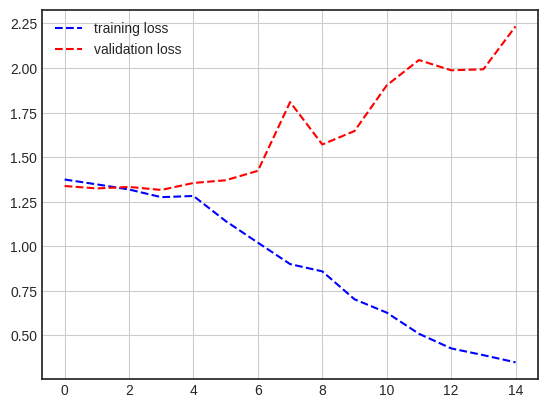

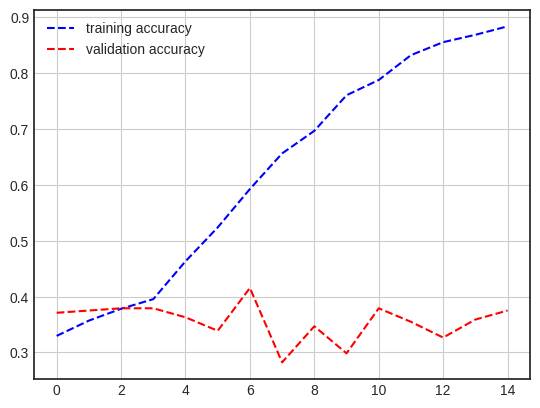

In [73]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'training loss')
plt.plot(val_loss, 'r--', label = 'validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'training accuracy')
plt.plot(val_acc, 'r--', label = 'validation accuracy')
plt.legend()
plt.grid()

plt.show

# 감정예측


In [74]:

def sentiment_predict(new_sentence):
    new_token = [word for word in okt.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = model.predict(new_pad)
    pred_index = np.argmax(score)

    if pred_index == 1:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score[0][pred_index] * 100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, score[0][pred_index] * 100))


In [76]:
# 긍정
sentiment_predict('공기가 정말 깨끗해요')
sentiment_predict('처음 써보는데 매우 좋아요')
sentiment_predict('배송도 매우 빨라요')
# 부정
sentiment_predict('효과가 완전 없어요')
sentiment_predict('파손이 됐어요')
sentiment_predict('리뷰쓰기도 아깝다')

1/1 [==============================] - 0s 94ms/step
공기가 정말 깨끗해요 -> 부정(66.27%)
1/1 [==============================] - 0s 65ms/step
처음 써보는데 매우 좋아요 -> 부정(47.27%)
1/1 [==============================] - 0s 106ms/step
배송도 매우 빨라요 -> 긍정(60.58%)
1/1 [==============================] - 0s 178ms/step
효과가 완전 없어요 -> 긍정(69.10%)
1/1 [==============================] - 0s 172ms/step
파손이 됐어요 -> 부정(47.57%)
1/1 [==============================] - 0s 94ms/step
리뷰쓰기도 아깝다 -> 부정(53.54%)
